imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from utils import create_dataloaders
from utils import plot_tsne
import AutoDecoder as AD

In [2]:
import importlib

In [3]:
importlib.reload(AD)

<module 'AutoDecoder' from '/home/nativ/Deep_learning_technion/Project - Autodecoder/AutoDecoder.py'>

In [4]:
# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(1337)
# Define model parameters
latent_dim = 128  # Dimension of latent space
output_shape = (1, 28, 28)  # Output shape for Fashion MNIST images

# Initialize model
auto_decoder = AD.AutoDecoder(latent_dim, output_shape).to(device)


In [9]:
# Create data loaders
train_ds, train_dl, test_ds, test_dl = create_dataloaders(data_path="dataset", batch_size=32)

In [6]:
# Initialize latent vectors
train_latents = torch.randn(len(train_ds), latent_dim, requires_grad=True, device=device)
test_latents = torch.randn(len(test_ds), latent_dim, requires_grad=False, device=device)


In [ ]:
# Split train_ds into train and validation sets
from torch.utils.data import random_split
val_size = len(train_ds) // 5  # 20% for validation
train_size = len(train_ds) - val_size
train_subset, val_subset = random_split(train_ds, [train_size, val_size])

train_dl = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_subset, batch_size=32, shuffle=False)
# Initialize latent vectors
train_latents = torch.randn(len(train_subset), latent_dim, requires_grad=True, device=device)
val_latents = torch.randn(len(val_subset), latent_dim, requires_grad=False, device=device)
test_latents = torch.randn(len(test_ds), latent_dim, requires_grad=False, device=device)

In [7]:
# Initialize optimizer
optimizer = optim.Adam(list(auto_decoder.parameters()) + [train_latents], lr=1e-3)

In [10]:
train_losses = AD.train_auto_decoder(auto_decoder, train_dl, optimizer, train_latents, device, epochs=100)

Epoch [1/100], Train Loss: 4.0992
Epoch [2/100], Train Loss: 4.0028
Epoch [3/100], Train Loss: 3.4558
Epoch [4/100], Train Loss: 2.7794
Epoch [5/100], Train Loss: 2.6862
Epoch [6/100], Train Loss: 2.6753
Epoch [7/100], Train Loss: 2.6720
Epoch [8/100], Train Loss: 2.6700
Epoch [9/100], Train Loss: 2.6684
Epoch [10/100], Train Loss: 2.6672
Epoch [11/100], Train Loss: 2.6661
Epoch [12/100], Train Loss: 2.6652
Epoch [13/100], Train Loss: 2.6644
Epoch [14/100], Train Loss: 2.6636
Epoch [15/100], Train Loss: 2.6629
Epoch [16/100], Train Loss: 2.6623
Epoch [17/100], Train Loss: 2.6617
Epoch [18/100], Train Loss: 2.6612
Epoch [19/100], Train Loss: 2.6607
Epoch [20/100], Train Loss: 2.6602
Epoch [21/100], Train Loss: 2.6598
Epoch [22/100], Train Loss: 2.6593
Epoch [23/100], Train Loss: 2.6589
Epoch [24/100], Train Loss: 2.6586
Epoch [25/100], Train Loss: 2.6582
Epoch [26/100], Train Loss: 2.6579
Epoch [27/100], Train Loss: 2.6576
Epoch [28/100], Train Loss: 2.6574
Epoch [29/100], Train Loss: 2

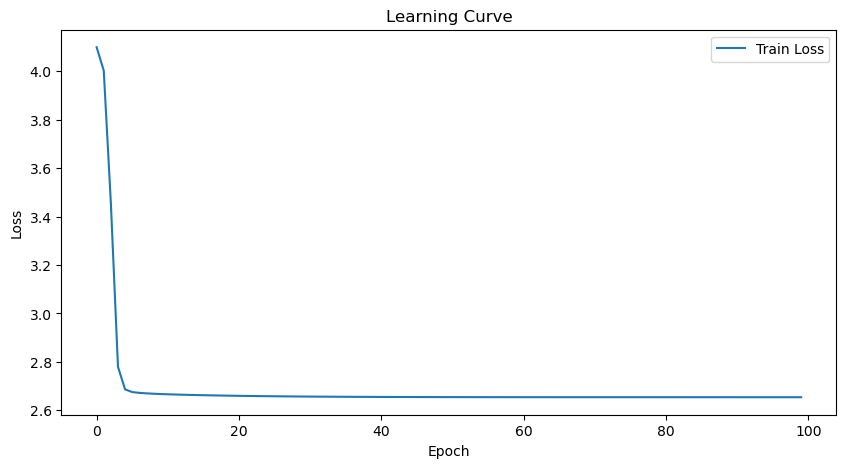

In [12]:
AD.plot_learning_curve(train_losses)

In [ ]:
AD.visualize_reconstructions(auto_decoder, train_dl, train_latents, device)

In [ ]:
AD.visualize_reconstructions(auto_decoder, test_dl, test_latents, device)

In [ ]:
plot_tsne(test_ds, test_latents, "test_tsne.png", plot_title="t-SNE Plot")
